<a href="https://colab.research.google.com/github/Monsoon886-cyb/ML-Codes/blob/main/K_Means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [44]:
class ZetaCluster:
  def __init__(self, n_clusters = 2, max_iter = 100):
    self.n_clus = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def awake_sento_mode(self, X):

    # Random centroids

    index_pos = random.sample(range(0,X.shape[0]), self.n_clus)
    self.centroids = X[index_pos]

    for i in range(self.max_iter):

      # Assign clusters
      cluster_groups = self.assign_clusters(X)

      # Update centroids
      old_centroids = self.centroids
      self.centroids = self.update_cent(cluster_groups, X)

      # Check
      if np.allclose(old_centroids, self.centroids):
        break

      return cluster_groups

  # Func. for Assigning clusters
  def assign_clusters(self, X):

    dist = []
    cluster_groups = []

    for row in X:
      for c in self.centroids:

        dist.append(np.sqrt(np.dot(row-c,row-c)))
      min_dist = min(dist)
      cluster_groups.append(dist.index(min_dist))
      dist.clear()

    return np.array(cluster_groups)

  # Func. for Updating centroids
  def update_cent(self, cluster_groups, X):
    new_cent = []

    unique_clus = np.unique(cluster_groups)

    for type in unique_clus:
      new_cent.append(X[cluster_groups == type].mean(axis=0))

    return np.array(new_cent)



In [59]:
X, y = make_blobs(n_samples=200, centers=3 ,n_features = 2, cluster_std=0.8, random_state=42)

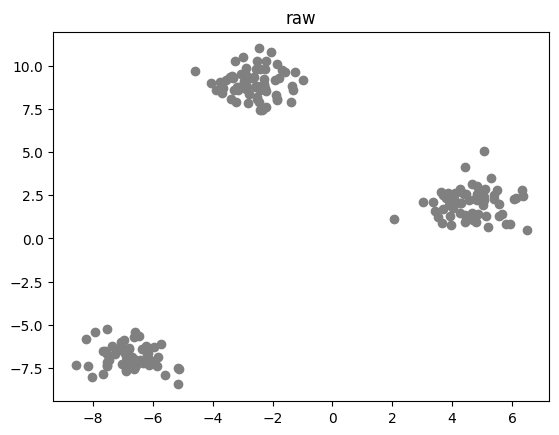

In [60]:
plt.scatter(X[:,0],X[:,1],c = 'gray' )
plt.title('raw')
plt.show()

In [61]:
zeta = ZetaCluster(n_clusters = 3, max_iter = 500)

In [62]:
y_means = zeta.awake_sento_mode(X)

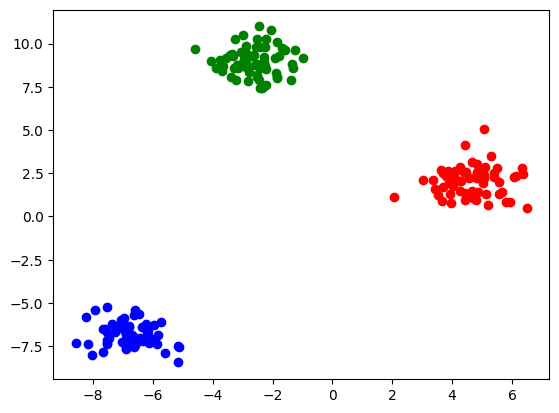

In [63]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')

plt.show()